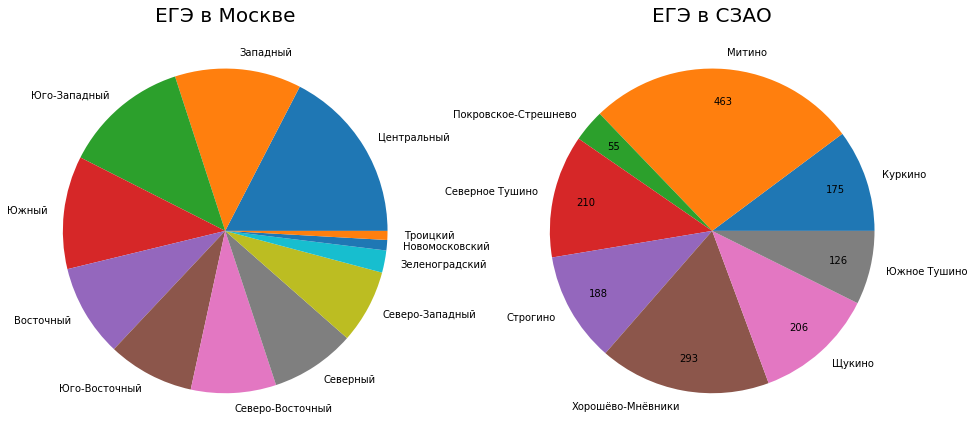

In [1]:
'''Загрузите данные по ЕГЭ за последние годы
https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv
выберите данные за 2018-2019 учебный год.
Выберите тип диаграммы для отображения результатов по административному округу Москвы, постройте выбранную
диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.
Выберите тип диаграммы и постройте ее для районов Северо-Западного административного округа Москвы для
количества школьников, написавших ЕГЭ на 220 баллов и выше.
Сколько школьников в Строгино, написавших ЕГЭ на 220 баллов и выше?'''

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data["District"] = data["District"].str.replace("район ","").astype("category")
data["AdmArea"] = data["AdmArea"].apply(lambda x:x.split(" ")[0]).astype("category")
data = data.set_index("YEAR").loc["2018-2019"].reset_index()

fig = plt.figure(figsize=(16,10))
area = fig.add_subplot(1, 2, 1)
area.set_title("ЕГЭ в Москве", fontsize=20)
data_adm = data.set_index("AdmArea")
data_adm["PASSES_OVER_220"].groupby("AdmArea").sum().sort_values(ascending=False).plot.pie(ax=area, label="")

area = fig.add_subplot(1, 2, 2)
area.set_title("ЕГЭ в СЗАО", fontsize=20)
data_district = data_adm.loc["Северо-Западный"].reset_index().set_index("District")
data_district = data_district["PASSES_OVER_220"].groupby("District").sum()
total = sum(data_district)

data_district.plot.pie(ax=area, label="", autopct=lambda x:int(round(total * x/100)), pctdistance=0.8)
plt.show()